# Segmentação de Clientes

Nesse Notebooks, vamos fazer segmetação de Clie

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
import plotly
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import plotly.offline as pyoff
import plotly.graph_objs as go
#initiate visualization library for jupyter notebook 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pyoff.init_notebook_mode(connected=True)


sns.set(style="ticks")
%matplotlib inline

import gc
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
np.random.seed(157)



import os,sys
sys.path.append("../src/")

from plot_functions import *

In [2]:
customers_ = pd.read_csv("../olist_data/olist_customers_dataset.csv")
order_items_ = pd.read_csv("../olist_data/olist_order_items_dataset.csv")
order_payments_ = pd.read_csv("../olist_data/olist_order_payments_dataset.csv")
orders_ = pd.read_csv("../olist_data/olist_orders_dataset.csv")
products = pd.read_csv("../olist_data/olist_products_dataset.csv")
sellers = pd.read_csv("../olist_data/olist_sellers_dataset.csv")
geoloc = pd.read_csv("../olist_data/olist_geolocation_dataset.csv")

In [3]:
# creating master dataframe 
order_payments_.head()
df1 = order_payments_.merge(order_items_, on='order_id')
df2 = df1.merge(orders_, on='order_id')
df3 = df2.merge(products,on ='product_id')
df4 = df3.merge(sellers,on = 'seller_id')
df5 = df4.merge(geoloc,left_on = 'seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')
df5.drop('seller_zip_code_prefix',axis = 1 ,inplace = True)
df = df5.merge(customers_, on='customer_id')
print(df.shape)

del customers_,order_items_,order_payments_,orders_,products,sellers,geoloc
del df1,df2,df3,df4,df5 # realasee memory

(16968656, 37)


In [4]:
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.8,...,SP,13321,-23.190244,-47.291571,salto,SP,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.8,...,SP,13321,-23.197673,-47.289170,salto,SP,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
2,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.8,...,SP,13321,-23.192899,-47.290064,salto,SP,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
3,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.8,...,SP,13321,-23.196044,-47.297890,salto,SP,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
4,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.8,...,SP,13321,-23.186042,-47.287610,salto,SP,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968656 entries, 0 to 16968655
Data columns (total 37 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   payment_sequential             int64  
 2   payment_type                   object 
 3   payment_installments           int64  
 4   payment_value                  float64
 5   order_item_id                  int64  
 6   product_id                     object 
 7   seller_id                      object 
 8   shipping_limit_date            object 
 9   price                          float64
 10  freight_value                  float64
 11  customer_id                    object 
 12  order_status                   object 
 13  order_purchase_timestamp       object 
 14  order_approved_at              object 
 15  order_delivered_carrier_date   object 
 16  order_delivered_customer_date  object 
 17  order_estimated_delivery_date  object 
 18  

In [6]:
df.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,customer_zip_code_prefix
count,1.696866e+07,1.696866e+07,1.696866e+07,1.696866e+07,1.696866e+07,1.696866e+07,1.673026e+07,1.673026e+07,1.673026e+07,1.696556e+07,1.696556e+07,1.696556e+07,1.696556e+07,1.696866e+07,1.696866e+07,1.696866e+07,1.696866e+07
mean,1.093144e+00,2.987025e+00,1.701961e+02,1.196161e+00,1.185072e+02,1.994965e+01,4.897545e+01,7.502588e+02,2.058988e+00,2.048708e+03,3.027128e+01,1.658920e+01,2.354683e+01,2.637739e+04,-2.262534e+01,-4.734352e+01,3.454145e+04
std,7.206346e-01,2.794144e+00,2.365137e+02,6.761946e-01,1.746978e+02,1.517883e+01,1.010350e+01,6.715138e+02,1.581102e+00,3.742914e+03,1.567591e+01,1.332002e+01,1.148593e+01,2.599717e+04,2.421630e+00,2.308424e+00,2.961954e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.500000e-01,0.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,6.000000e+00,1.001000e+03,-3.660537e+01,-6.788472e+01,1.003000e+03
25%,1.000000e+00,1.000000e+00,6.197000e+01,1.000000e+00,4.000000e+01,1.337000e+01,4.300000e+01,3.200000e+02,1.000000e+00,3.000000e+02,1.800000e+01,9.000000e+00,1.500000e+01,1.224300e+04,-2.357379e+01,-4.882996e+01,1.107500e+04
50%,1.000000e+00,2.000000e+00,1.080000e+02,1.000000e+00,7.490000e+01,1.632000e+01,5.200000e+01,5.370000e+02,1.000000e+00,7.000000e+02,2.500000e+01,1.300000e+01,2.000000e+01,1.494000e+04,-2.283365e+01,-4.720955e+01,2.403000e+04
75%,1.000000e+00,4.000000e+00,1.890600e+02,1.000000e+00,1.299900e+02,2.099000e+01,5.700000e+01,9.320000e+02,3.000000e+00,1.700000e+03,3.800000e+01,2.000000e+01,3.000000e+01,3.125500e+04,-2.174710e+01,-4.645654e+01,5.664000e+04
max,2.900000e+01,2.400000e+01,1.366408e+04,2.100000e+01,6.735000e+03,4.096800e+02,7.600000e+01,3.992000e+03,2.000000e+01,4.042500e+04,1.050000e+02,1.050000e+02,1.180000e+02,9.973000e+04,-2.484892e+00,-3.484769e+01,9.999000e+04


## Limpeza dos dados

In [7]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [8]:
# cleaning up name columns
df['customer_city'] = df['customer_city'].str.title()
df['payment_type'] = df['payment_type'].str.replace('_', ' ').str.title()
# engineering new/essential columns
df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# Changing the month attribute for correct ordenation
df['month_year'] = df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['month_year'] = df['order_purchase_year'].astype(str) + '-' + df['month_year'].astype(str)
#creating year month column
df['month_y'] = df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [9]:
# displaying summary staticstics of columns
df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,customer_state,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y
count,16968656,1.696866e+07,16968656,1.696866e+07,1.696866e+07,1.696866e+07,16968656,16968656,16968656,1.696866e+07,...,16968656,1.660391e+07,1.696866e+07,1.696866e+07,1.696866e+07,1.696866e+07,16968656,16968656,16968656,1.696866e+07
unique,98449,NaN,4,NaN,NaN,NaN,32889,3088,93120,NaN,...,27,NaN,NaN,NaN,NaN,NaN,7,12,24,NaN
top,ccf804e764ed5650cd8759557269dc13,NaN,Credit Card,NaN,NaN,NaN,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-06-15 16:15:08,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,Mon,May,2017-11,NaN
freq,7436,NaN,12550075,NaN,NaN,NaN,150150,610038,7436,NaN,...,7180708,NaN,NaN,NaN,NaN,NaN,2744588,1850220,1348316,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.093144e+00,NaN,2.987025e+00,1.701961e+02,1.196161e+00,NaN,NaN,NaN,1.185072e+02,...,NaN,1.114996e+01,2.017514e+03,6.093955e+00,2.755693e+00,1.476111e+01,NaN,NaN,NaN,2.017575e+05
std,NaN,7.206346e-01,NaN,2.794144e+00,2.365137e+02,6.761946e-01,NaN,NaN,NaN,1.746978e+02,...,NaN,1.029627e+01,5.066357e-01,3.225447e+00,1.962853e+00,5.342232e+00,NaN,NaN,NaN,4.899316e+01
min,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,NaN,8.500000e-01,...,NaN,-1.890000e+02,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,2.016090e+05
25%,NaN,1.000000e+00,NaN,1.000000e+00,6.197000e+01,1.000000e+00,NaN,NaN,NaN,4.000000e+01,...,NaN,6.000000e+00,2.017000e+03,3.000000e+00,1.000000e+00,1.100000e+01,NaN,NaN,NaN,2.017080e+05


In [10]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()

,delivery_against_estimated,order_delivered_customer_date,product_photos_qty,product_description_lenght,product_name_lenght,product_category_name,order_delivered_carrier_date,product_length_cm,product_width_cm,product_height_cm,...,seller_id,price,seller_city,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,month_y
Values,364745.000000,364745.000000,238400.000000,238400.000000,238400.000000,238400.000000,178664.000000,3093.000000,3093.000000,3093.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,2.149522,2.149522,1.404943,1.404943,1.404943,1.404943,1.052906,0.018228,0.018228,0.018228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# dropping missing values
df.dropna(inplace=True)
df.isnull().values.any()

False

## Análise exploratória de dados

In [12]:
n_customers = df['customer_unique_id'].nunique()
print('Unique customers: {}'.format(n_customers))
n_cities = df['customer_city'].nunique()
print('Unique cities: {}'.format(n_cities))

Unique customers: 91882
Unique cities: 4068


In [13]:
# City disctribution
df['customer_city'].value_counts().sort_values(ascending=False)

Sao Paulo                  2603836
Rio De Janeiro             1191875
Belo Horizonte              476749
Brasilia                    347314
Curitiba                    253422
                            ...   
Sao Francisco Do Gloria          1
Lagoao                           1
Tracunhaem                       1
Bataipora                        1
Barreira                         1
Name: customer_city, Length: 4068, dtype: int64

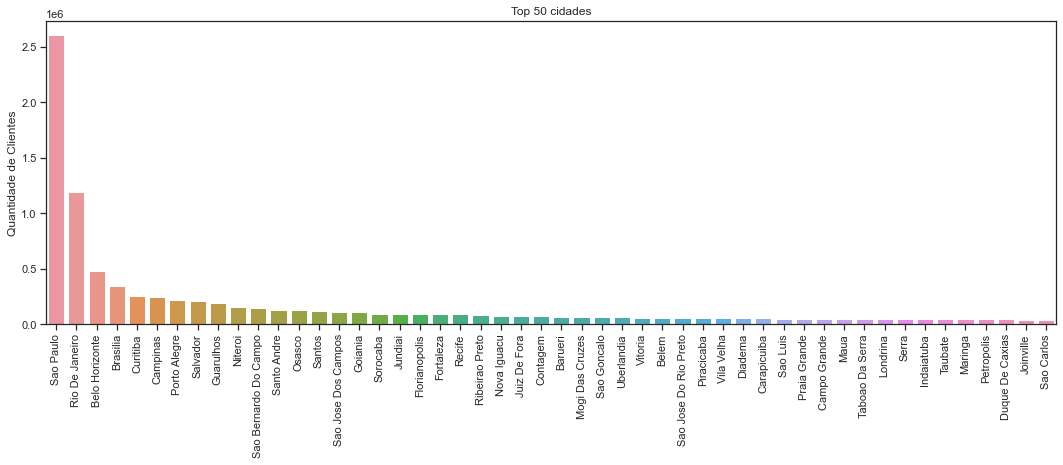

In [14]:
cities = df['customer_city'].value_counts().sort_values(ascending=False).head(50).to_frame()
plt.figure(figsize=(15,5))
sns.barplot(x = cities.index.values.flatten() ,y = cities.values.flatten())
plt.tight_layout()
plt.xticks(rotation = 90)
plt.title('Top 50 cidades')
plt.ylabel('Quantidade de Clientes');

In [15]:
# How many states are the customers from?
df['customer_state'].nunique()

27

In [16]:
cities = df['customer_city'].value_counts().sort_values(ascending=False).head(50).to_frame()


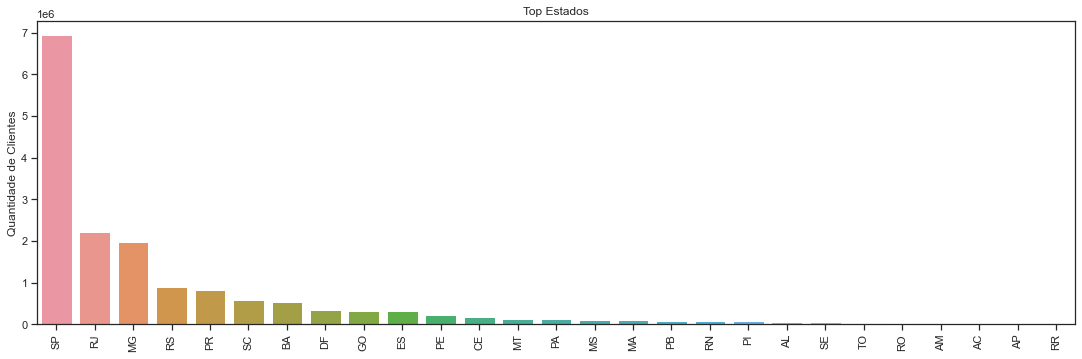

In [17]:
states = df['customer_state'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x = states.index.values.flatten() ,y = states.values.flatten())
plt.tight_layout()
plt.xticks(rotation = 90)
plt.title('Top Estados')
plt.ylabel('Quantidade de Clientes');

In [18]:
df_customer_dly = df.groupby(
    'customer_unique_id',
    as_index=False).agg({
        'order_purchase_timestamp': 'min'
        })

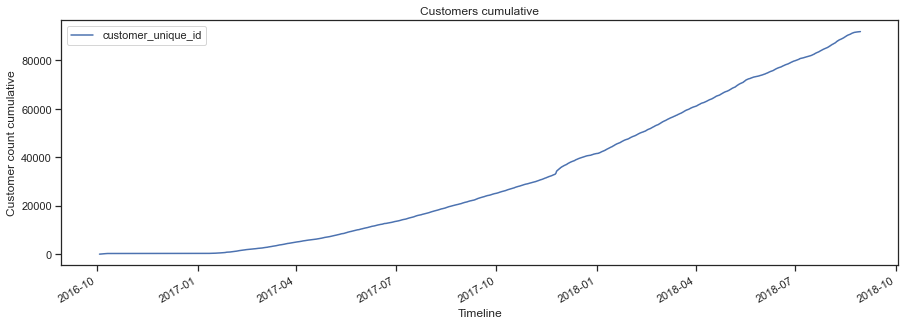

In [19]:
df_customer_dly.groupby('order_purchase_timestamp').count().cumsum().plot(figsize=(15,5))
plt.title('Customers cumulative')
plt.xlabel('Timeline')
plt.ylabel('Customer count cumulative');

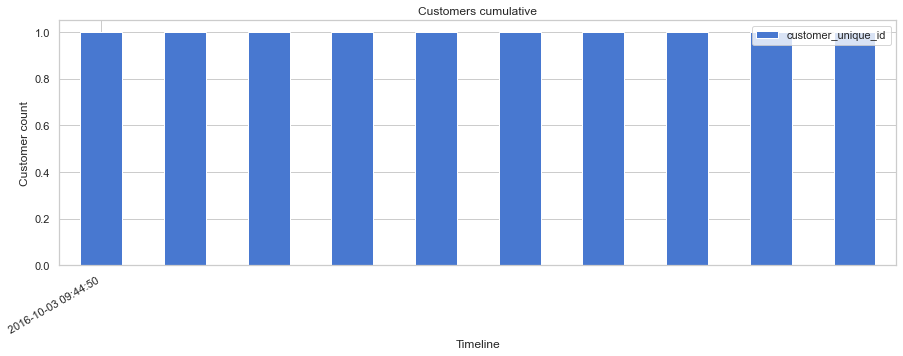

In [26]:

# New customers count by day
ax = df_customer_dly.groupby('order_purchase_timestamp').count().head(10).plot(kind='bar', figsize=(15,5))
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.title('Customers cumulative')
plt.xlabel('Timeline')
plt.ylabel('Customer count');

**Crescimento Mensal**

In [21]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_revenue = df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

,month_year,payment_value
0,2016-10,8.895462e+06
1,2016-12,2.786040e+03
2,2017-01,2.436770e+07
3,2017-02,4.922758e+07
4,2017-03,7.408619e+07
5,2017-04,6.860478e+07
6,2017-05,1.092714e+08
7,2017-06,8.047566e+07
8,2017-07,1.105246e+08
9,2017-08,1.225495e+08


In [22]:
#calculating for monthly revenie growth rate
# using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['payment_value'].pct_change()

df_revenue

,month_year,payment_value,MonthlyGrowth
0,2016-10,8.895462e+06,NaN
1,2016-12,2.786040e+03,-0.999687
2,2017-01,2.436770e+07,8745.355454
3,2017-02,4.922758e+07,1.020198
4,2017-03,7.408619e+07,0.504973
5,2017-04,6.860478e+07,-0.073987
6,2017-05,1.092714e+08,0.592766
7,2017-06,8.047566e+07,-0.263525
8,2017-07,1.105246e+08,0.373391
9,2017-08,1.225495e+08,0.108799


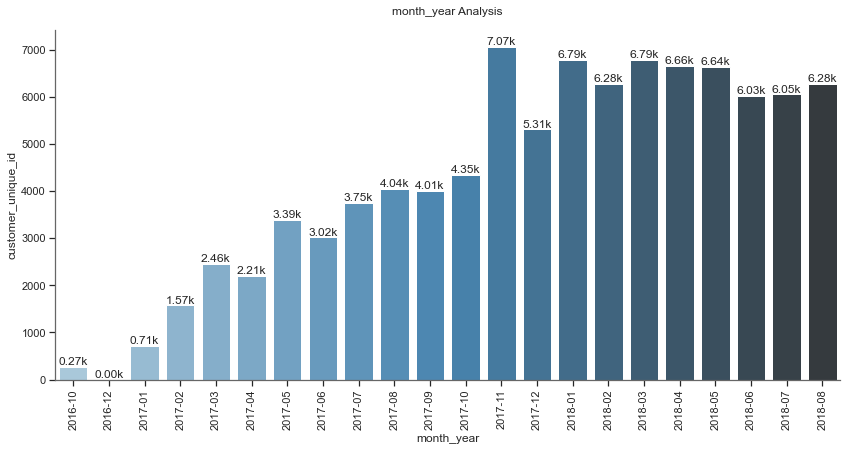

In [23]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = df.groupby('month_year')['customer_unique_id'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='customer_unique_id', df=df_monthly_active, value=True)
ax.tick_params(axis='x', labelrotation=90)


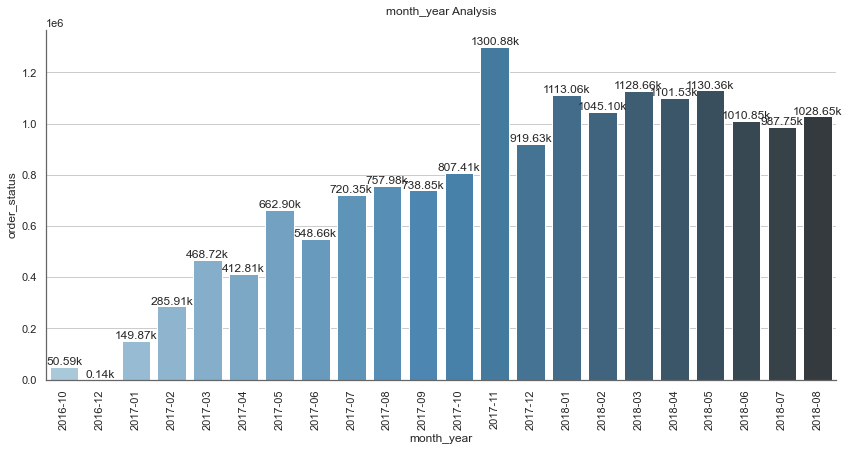

In [24]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_sales = df.groupby('month_year')['order_status'].count().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='order_status', df=df_monthly_sales, value=True)
ax.tick_params(axis='x', labelrotation=90)


**Média de por compra de clientes

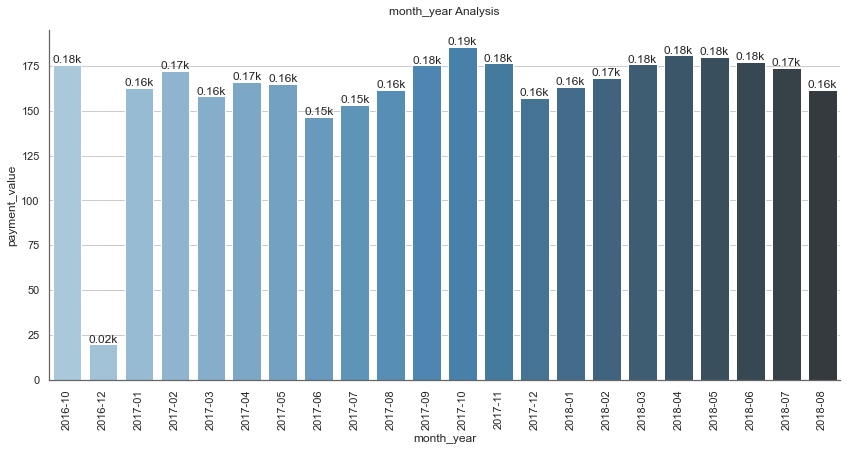

In [25]:
# create a new dataframe for average revenue by taking the mean of it
df_monthly_order_avg = df.groupby('month_year')['payment_value'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='payment_value', df=df_monthly_order_avg, value=True)
ax.tick_params(axis='x', labelrotation=90)